In [2]:
import numpy as np
import pandas as pd

In [1]:
!pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 37.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.0 MB/s eta 0:00:00


In [3]:
import xarray as xr

nc_file = '/kaggle/input/iiser-project-data-ees/data.nc'
dataset = xr.open_dataset(nc_file)

# metadata
print(dataset)

<xarray.Dataset> Size: 85MB
Dimensions:    (longitude: 17, latitude: 11, time: 4392)
Coordinates:
  * longitude  (longitude) float32 68B 77.2 77.45 77.7 77.95 ... 80.7 80.95 81.2
  * latitude   (latitude) float32 44B 31.3 31.05 30.8 30.55 ... 29.3 29.05 28.8
  * time       (time) datetime64[ns] 35kB 2013-04-01 ... 2013-09-30T23:00:00
Data variables: (12/13)
    t2m        (time, latitude, longitude) float64 7MB ...
    cbh        (time, latitude, longitude) float64 7MB ...
    hcc        (time, latitude, longitude) float64 7MB ...
    lcc        (time, latitude, longitude) float64 7MB ...
    msl        (time, latitude, longitude) float64 7MB ...
    mcc        (time, latitude, longitude) float64 7MB ...
    ...         ...
    sp         (time, latitude, longitude) float64 7MB ...
    sshf       (time, latitude, longitude) float64 7MB ...
    tcc        (time, latitude, longitude) float64 7MB ...
    tciw       (time, latitude, longitude) float64 7MB ...
    tclw       (time, latitude

In [4]:
data_vars = dataset.data_vars
num_variables = len(data_vars)
print("Number of variables:", num_variables)
data_vars

Number of variables: 13


Data variables:
    t2m      (time, latitude, longitude) float64 7MB ...
    cbh      (time, latitude, longitude) float64 7MB ...
    hcc      (time, latitude, longitude) float64 7MB ...
    lcc      (time, latitude, longitude) float64 7MB ...
    msl      (time, latitude, longitude) float64 7MB ...
    mcc      (time, latitude, longitude) float64 7MB ...
    slhf     (time, latitude, longitude) float64 7MB ...
    sp       (time, latitude, longitude) float64 7MB ...
    sshf     (time, latitude, longitude) float64 7MB ...
    tcc      (time, latitude, longitude) float64 7MB ...
    tciw     (time, latitude, longitude) float64 7MB ...
    tclw     (time, latitude, longitude) float64 7MB ...
    tp       (time, latitude, longitude) float64 7MB ...

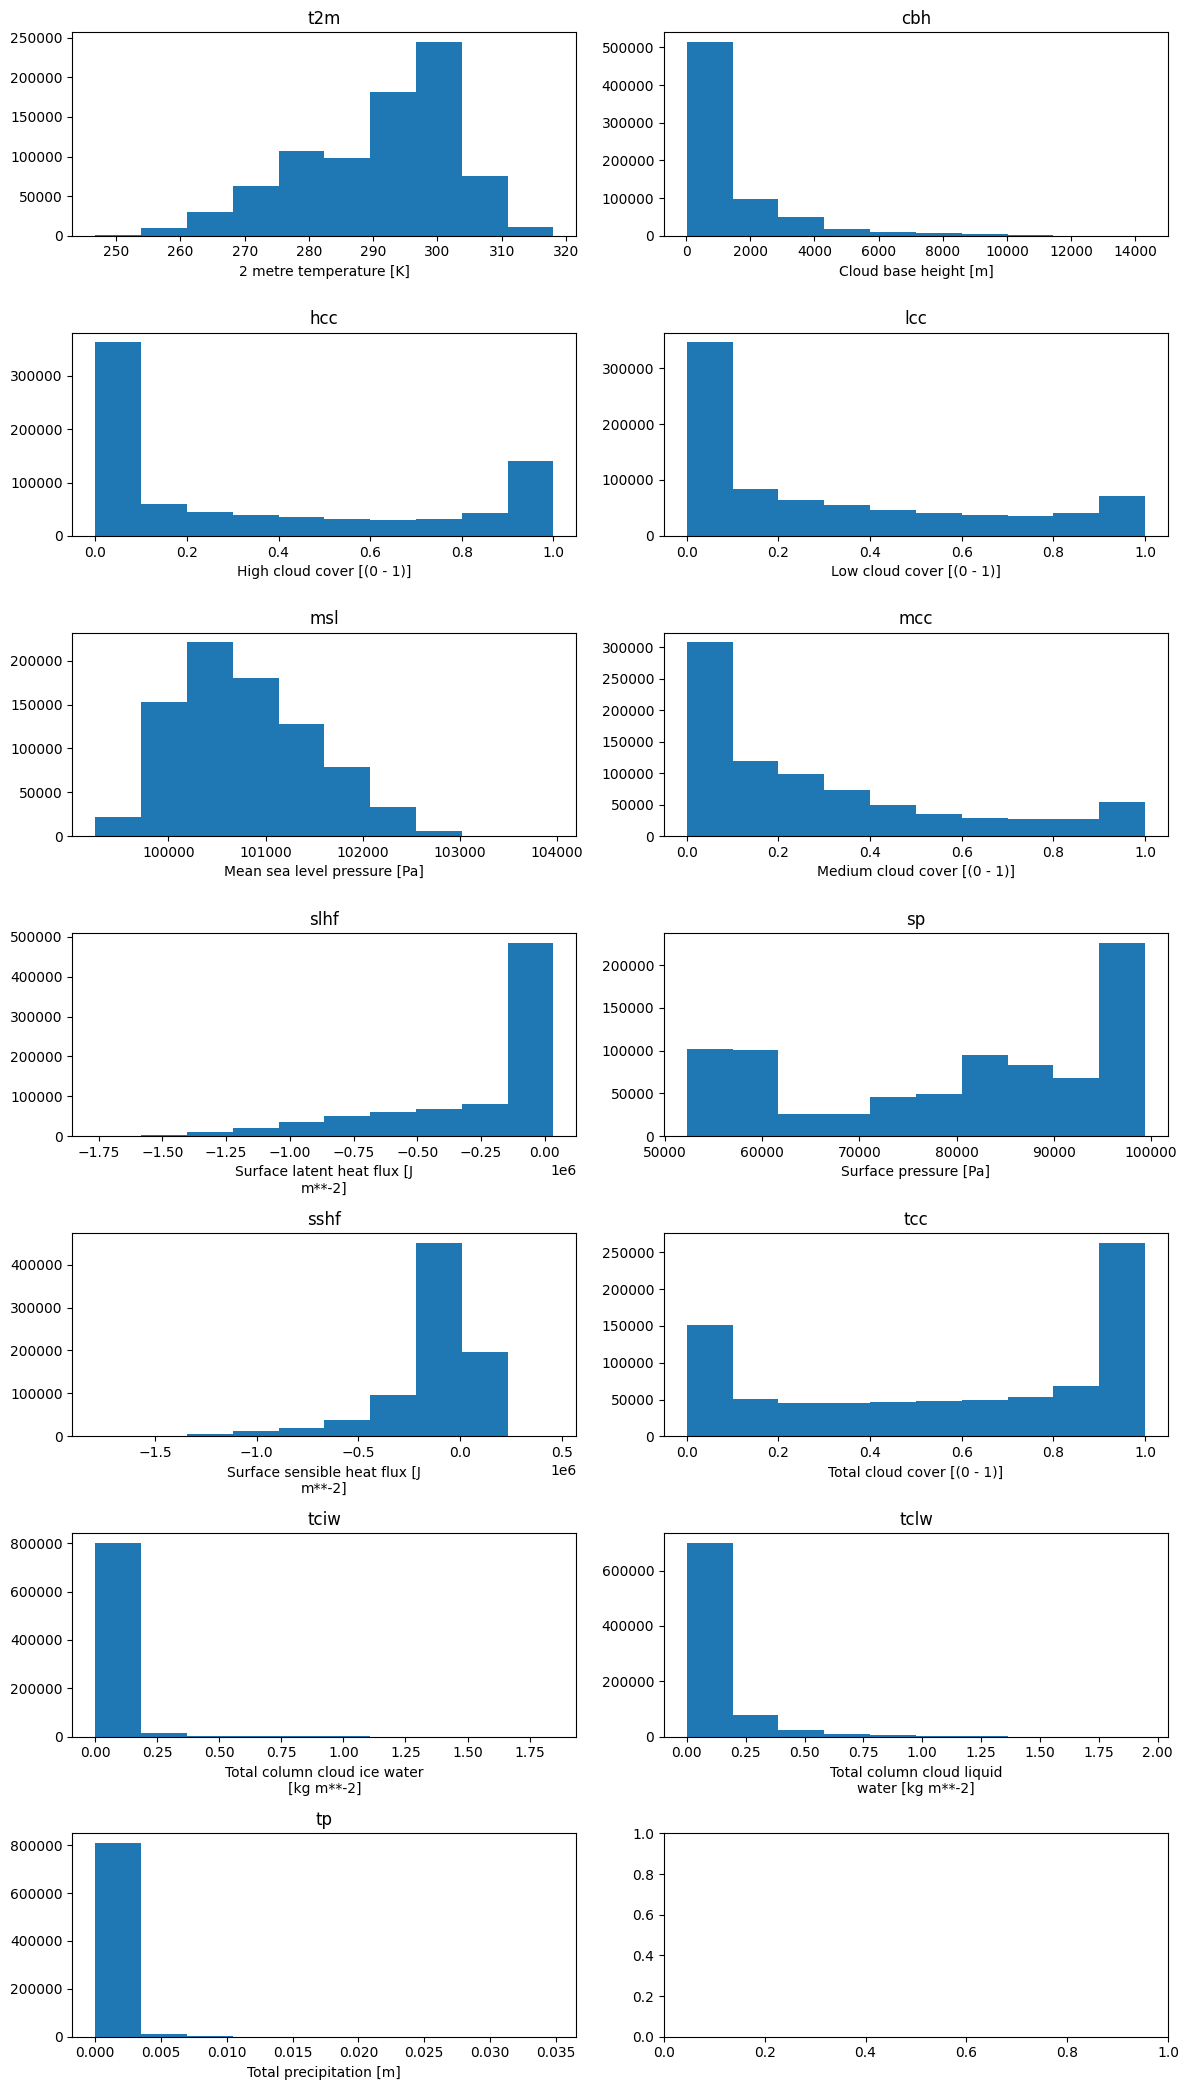

In [5]:
import matplotlib.pyplot as plt

data_vars = dataset.data_vars
num_variables = len(data_vars)

num_cols = 2 
num_rows = (num_variables + num_cols - 1) // num_cols 

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

for i, var_name in enumerate(data_vars):
    row = i // num_cols
    col = i % num_cols
    var_data = data_vars[var_name]
    var_data.plot(ax=axs[row, col])
    axs[row, col].set_title(var_name)

plt.tight_layout()
plt.show()

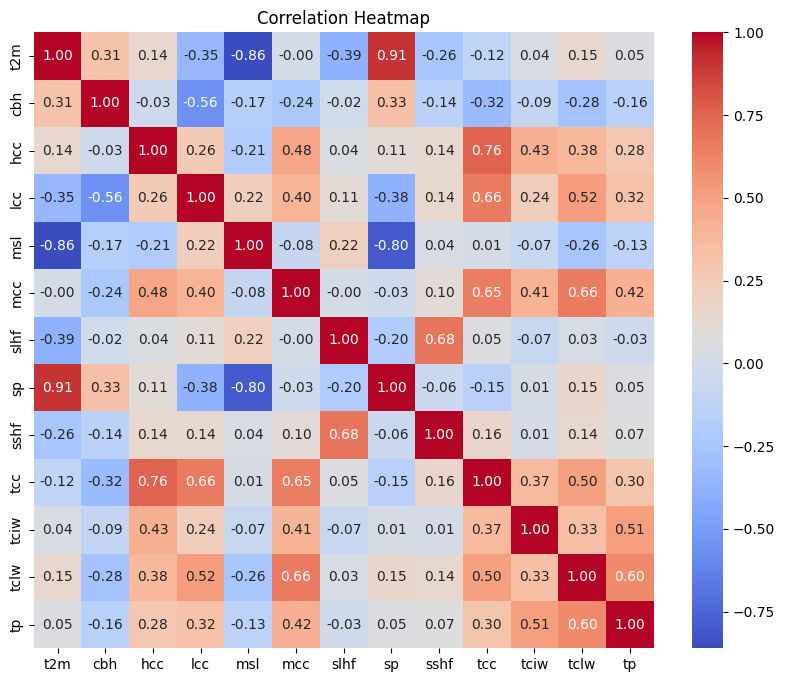

In [6]:
import seaborn as sns

correlation_matrix = dataset.to_dataframe().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [7]:
len(dataset.coords['time'])


4392

In [10]:
tp=data_vars["tp"]

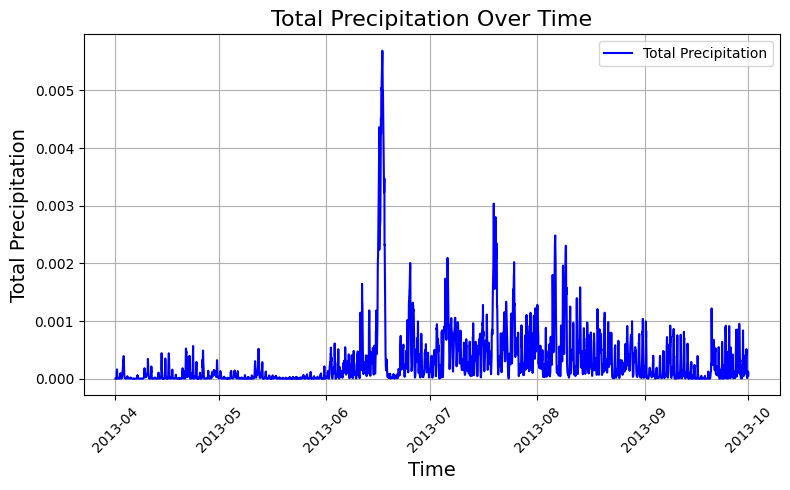

In [22]:
# Aggregate the tp variable along latitude and longitude dimensions to create a 1D array
tp_agg = data_vars['tp'].mean(dim=('latitude', 'longitude'))

plt.figure(figsize=(8, 5))
plt.plot(dataset.coords['time'], tp_agg, linestyle='-', color='b', label='Total Precipitation')
plt.title('Total Precipitation Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Total Precipitation', fontsize=14)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
import xarray as xr
import pandas as pd

data_vars = dataset.data_vars
time_series = {}

for var in data_vars:
    time_series[var] = dataset[var].mean(dim=('latitude', 'longitude')).to_series()

df = pd.DataFrame(time_series)

In [26]:
# Set the time as the index
df.index = pd.to_datetime(df.index)
df = df.sort_index() 
df

,t2m,cbh,hcc,lcc,msl,mcc,slhf,sp,sshf,tcc,tciw,tclw,tp
time,,,,,,,,,,,,,
2013-04-01 00:00:00,277.557286,993.271011,0.000000,0.111965,101406.024484,0.015405,-4708.431520,80235.106932,23626.860150,0.121695,0.000102,0.004660,5.454105e-07
2013-04-01 01:00:00,277.674502,1074.281289,0.000000,0.103391,101452.843449,0.013267,-6368.053999,80269.097426,21416.226994,0.112833,0.000108,0.004142,7.016479e-07
2013-04-01 02:00:00,279.714486,1112.203507,0.000000,0.095786,101508.502139,0.010417,-55317.748352,80314.784773,-14496.630499,0.103953,0.000103,0.003229,6.902852e-07
2013-04-01 03:00:00,283.512057,1209.058079,0.000000,0.080642,101579.213410,0.010736,-205080.889654,80376.807711,-123910.465658,0.087280,0.000084,0.002639,4.118986e-07
2013-04-01 04:00:00,285.260764,840.676315,0.000000,0.052763,101574.805281,0.007218,-383343.092226,80396.089633,-277784.694630,0.058197,0.000136,0.003307,3.209968e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-30 19:00:00,287.620700,1041.883254,0.148640,0.348879,101303.776892,0.261247,-12793.241424,80384.450476,1856.169645,0.608611,0.009056,0.093617,9.707171e-05
2013-09-30 20:00:00,287.123050,895.337389,0.136557,0.362765,101283.374002,0.288120,-13149.576879,80358.375840,1633.635026,0.624861,0.008241,0.099422,8.066678e-05
2013-09-30 21:00:00,287.108038,803.404513,0.119510,0.350475,101283.176256,0.301823,-12903.706882,80352.637036,1303.511356,0.605299,0.006047,0.103902,1.045825e-04
